In [2]:
from sklearn.datasets import make_blobs

In [11]:
centriods = [[1,1],[5,5]]
centriods_std = [1,1]
x,y = make_blobs(n_samples=200,centers=centriods,cluster_std=centriods_std,n_features=2)
x.shape

(200, 2)

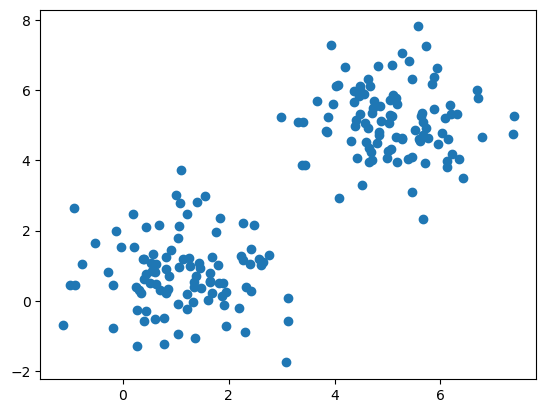

In [12]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1])

In [25]:
import random
import numpy as np
class My_KMeans:
    def __init__(self,max_iter,n_clusters):
        self.max_iter_ = max_iter
        self.n_clusters_ = n_clusters
        self.centroids_ = None
    def fit_predict(self,x):
        random_idx = random.sample(range(0,x.shape[0]),self.n_clusters_)
        self.centroids_ = x[random_idx]
        for i in range(self.max_iter_):
            # assign clusetrs
            cluster_grp = self.assign_cluster(x,self.centroids_)
            # move clusters
            old_centroids = self.centroids_
            new_centroids = self.move_centeroids(x,cluster_grp)
            self.centroids_ = new_centroids
            # check finish
            if (old_centroids==new_centroids).all():
                break
        return cluster_grp

    
    def move_centeroids(self,x,cluster_grp):
        cluster_type = np.unique(cluster_grp)
        new_centroids = []
        for type in cluster_type:
            new_centroid = x[cluster_grp==type].mean(axis=0)
            new_centroids.append(new_centroid)
        return new_centroid
    def assign_cluster(self,x,centroids):
        cluster_grp = []
        for row in x:
            distances = []
            for centroid in centroids:
                dis = np.sqrt(np.dot(row-centroid,row-centroid))
                distances.append(dis)
            dis_min = min(distances)
            centriod_assigned = distances.index(dis_min)
            cluster_grp.append(centriod_assigned)
        return np.array(cluster_grp)

In [50]:
km = My_KMeans(max_iter=500,n_clusters=2)
y_means = km.fit_predict(x)

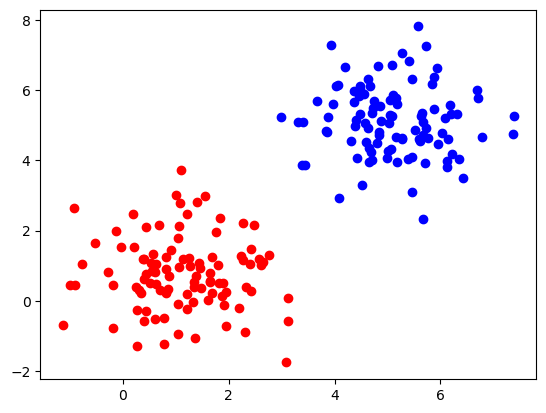

In [51]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],color='blue')
plt.scatter(x[y_means==1,0],x[y_means==1,1],color='red')
# plt.plot(x[y_means=0,0],x[y_means=0,1],color='blue')
# plt.plot(x[y_means=0,0],x[y_means=0,1],color='blue')